In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
img = cv2.imread('Documents/opencv/DATA/car_plate.jpg')

In [27]:
def display(img):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    new_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)

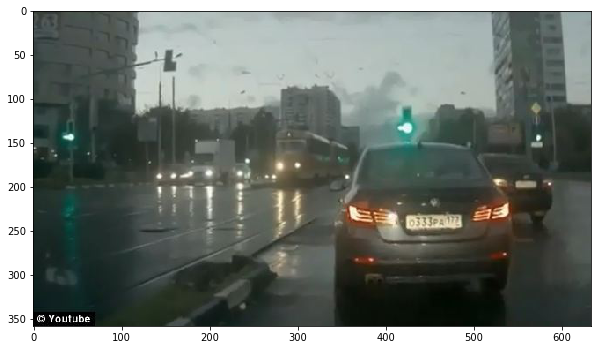

In [28]:
display(img)

In [29]:
plate_cascade = cv2.CascadeClassifier('Documents/opencv/DATA/haarcascades/haarcascade_russian_plate_number.xml')

In [33]:
def detect_plate(img):
    plate_img = img.copy()
    plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.3,minNeighbors=3)
    for (x,y,w,h) in plate_rects:
        cv2.rectangle(plate_img,(x,y),(x+w,y+h),(255,0,0),5)
    return plate_img

In [34]:
result = detect_plate(img)

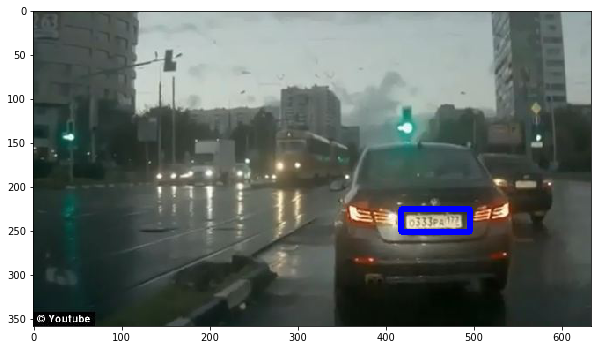

In [35]:
display(result)

In [38]:
def detect_and_blur_plate(img):
    plate_img = img.copy()
    roi = img.copy()
    plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.3,minNeighbors=3)
    for (x,y,w,h) in plate_rects:
        roi = roi[y:y+h,x:x+w]
        blurred_roi = cv2.medianBlur(roi,7)
        plate_img[y:y+h,x:x+w] = blurred_roi
    return plate_img
    

In [39]:
result = detect_and_blur_plate(img)

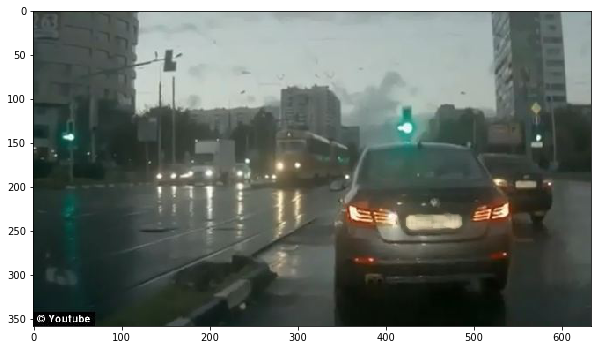

In [40]:
display(result)